In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("global_heat_index.csv")
data.head(5)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [5]:
clean1 = data[data["Hour"]<6]
clean2 = data[data["Hour"]>18]

In [9]:
data = data.drop(clean1.index, axis=0)
data = data.drop(clean2.index, axis=0)

In [11]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


### Input and Output

In [14]:
x = data.iloc[:,0:10]
y = data.iloc[:,10:11]

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)


## <font color="blue"> Select K Best </font>

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
best_features = SelectKBest(score_func=chi2, k=10).fit(x,y)


In [31]:
col = ["Year", "Month", "Day", "Hour", "Dew Point", "Temperature", "Pressure", "Relative Humidity", "Wind Direction", "Wind Speed"]
features_score = pd.Series(best_features.scores_, index = col)

In [32]:
features_score

Year                 504.976721
Month                236.303859
Day                  208.497847
Hour                 271.978728
Dew Point             74.952667
Temperature          306.062548
Pressure             213.040872
Relative Humidity    397.828591
Wind Direction       221.823327
Wind Speed           148.735716
dtype: float64

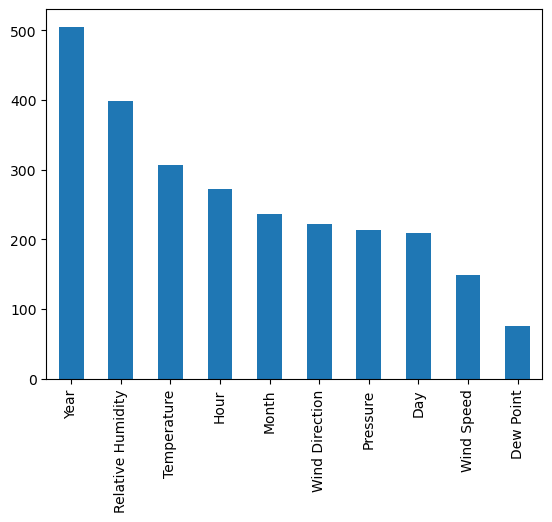

In [33]:
features_score.nlargest(10).plot(kind="bar")
plt.show()